In [1]:
####训练集产生
import random
class AES:
    MIX_C  = [[0x2, 0x3, 0x1, 0x1], [0x1, 0x2, 0x3, 0x1], [0x1, 0x1, 0x2, 0x3], [0x3, 0x1, 0x1, 0x2]]
    I_MIXC = [[0xe, 0xb, 0xd, 0x9], [0x9, 0xe, 0xb, 0xd], [0xd, 0x9, 0xe, 0xb], [0xb, 0xd, 0x9, 0xe]]
    RCon   = [0x01000000, 0x02000000, 0x04000000, 0x08000000, 0x10000000, 0x20000000, 0x40000000, 0x80000000, 0x1B000000, 0x36000000]

    S_BOX = [[0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
             [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
             [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
             [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
             [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
             [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
             [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
             [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
             [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
             [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
             [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
             [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
             [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
             [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
             [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
             [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]]

    I_SBOX = [[0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB],
              [0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB],
              [0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E],
              [0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25],
              [0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92],
              [0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84],
              [0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06],
              [0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B],
              [0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73],
              [0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E],
              [0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B],
              [0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4],
              [0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F],
              [0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF],
              [0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61],
              [0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D]]

    def SubBytes(self, State):
        # 字节替换
        return [self.S_BOX[i][j] for i, j in 
               [(_ >> 4, _ & 0xF) for _ in State]]

    def SubBytes_Inv(self, State):
        # 字节逆替换
        return [self.I_SBOX[i][j] for i, j in
               [(_ >> 4, _ & 0xF) for _ in State]]

    def ShiftRows(self, S):
        # 行移位
        return [S[ 0], S[ 5], S[10], S[15], 
                S[ 4], S[ 9], S[14], S[ 3],
                S[ 8], S[13], S[ 2], S[ 7],
                S[12], S[ 1], S[ 6], S[11]]

    def ShiftRows_Inv(self, S):
        # 逆行移位
        return [S[ 0], S[13], S[10], S[ 7],
                S[ 4], S[ 1], S[14], S[11],
                S[ 8], S[ 5], S[ 2], S[15],
                S[12], S[ 9], S[ 6], S[ 3]]

    def MixColumns(self, State):
        # 列混合
        return self.Matrix_Mul(self.MIX_C, State)

    def MixColumns_Inv(self, State):
        # 逆列混合
        return self.Matrix_Mul(self.I_MIXC, State)

    def RotWord(self, _4byte_block):
        # 用于生成轮密钥的字移位
        return ((_4byte_block & 0xffffff) << 8) + (_4byte_block >> 24)

    def SubWord(self, _4byte_block):
        # 用于生成密钥的字节替换
        result = 0
        for position in range(4):
            i = _4byte_block >> position * 8 + 4 & 0xf
            j = _4byte_block >> position * 8 & 0xf
            result ^= self.S_BOX[i][j] << position * 8
        return result

    def mod(self, poly, mod = 0b100011011):  
        # poly模多项式mod
        while poly.bit_length() > 8:
            poly ^= mod << poly.bit_length() - 9
        return poly

    def mul(self, poly1, poly2):
        # 多项式相乘
        result = 0
        for index in range(poly2.bit_length()):
            if poly2 & 1 << index:
                result ^= poly1 << index
        return result

    def Matrix_Mul(self, M1, M2):  # M1 = MIX_C  M2 = State
        # 用于列混合的矩阵相乘
        M = [0] * 16
        for row in range(4):
            for col in range(4):
                for Round in range(4):
                    M[row + col*4] ^= self.mul(M1[row][Round], M2[Round+col*4])
                M[row + col*4] = self.mod(M[row + col*4])
        return M

    def round_key_generator(self, _16bytes_key):
        # 轮密钥产生
        w = [_16bytes_key >> 96, 
             _16bytes_key >> 64 & 0xFFFFFFFF, 
             _16bytes_key >> 32 & 0xFFFFFFFF, 
             _16bytes_key & 0xFFFFFFFF] + [0]*40
        for i in range(4, 44):
            temp = w[i-1]
            if not i % 4:
                temp = self.SubWord(self.RotWord(temp)) ^ self.RCon[i//4-1]
            w[i] = w[i-4] ^ temp
        return [self.num_2_16bytes(
                    sum([w[4 * i] << 96, w[4*i+1] << 64, 
                         w[4*i+2] << 32, w[4*i+3]])
                    ) for i in range(8)]

    def AddRoundKey(self, State, RoundKeys, index):
        # 异或轮密钥
        return self._16bytes_xor(State, RoundKeys[index])

    def _16bytes_xor(self, _16bytes_1, _16bytes_2):
        return [_16bytes_1[i] ^ _16bytes_2[i] for i in range(16)]

    def _16bytes2num(cls, _16bytes):
        # 16字节转数字
        return int.from_bytes(_16bytes, byteorder = 'big')

    def num_2_16bytes(cls, num):
        # 数字转16字节
        return num.to_bytes(16, byteorder = 'big')

    def aes_encrypt(self, plaintext_list, RoundKeys):
        State = plaintext_list
        State = self.AddRoundKey(State, RoundKeys, 0)
        for Round in range(1, 10):
            State = self.SubBytes(State)
            State = self.ShiftRows(State)
            State = self.MixColumns(State)
            State = self.AddRoundKey(State, RoundKeys, Round)
        State = self.SubBytes(State)
        State = self.ShiftRows(State)
        State = self.AddRoundKey(State, RoundKeys, 10)
        return State

    def aes_decrypt(self, ciphertext_list, RoundKeys):
        State = ciphertext_list
        State = self.AddRoundKey(State, RoundKeys, 10)
        for Round in range(1, 10):
            State = self.ShiftRows_Inv(State)
            State = self.SubBytes_Inv(State)
            State = self.AddRoundKey(State, RoundKeys, 10-Round)
            State = self.MixColumns_Inv(State)
        State = self.ShiftRows_Inv(State)
        State = self.SubBytes_Inv(State)
        State = self.AddRoundKey(State, RoundKeys, 0)
        return State
    
    
    def double_int_list2double_binary_list(self, np_input, num):
        np_input_sec = np.zeros((num,128))
        for i in range(len(np_input)):
            binary_list = [format(int(j), '08b') for j in np_input[i]]
            result = [[int(bit) for bit in binary_str] for binary_str in binary_list]
            result = list(chain(*result))
            np_input_sec[i] = result
        return np_input_sec

In [2]:
AesBox=[[0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76], 
                  [ 0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0], 
                   [0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15],
                   [0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75], 
                   [0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84], 
                   [0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf],
                   [0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8],
                   [0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2],
                   [0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73],
                   [0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb], 
                   [0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79], 
                   [0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08], 
                   [0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a], 
                   [0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e], 
                   [0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf],
                   [0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]]
temp=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 手动创建一个二维列表
AES_Dif_Value = []
for _ in range(256):
    row = []  # 新建一个空列表作为行[]
    for _ in range(256):
        row.append([])  # 添加元素到行
    AES_Dif_Value.append(row)  # 将行添加到二维列表
    
AesResult=[]
for i in range(256):
    AesResult.append(temp[:])
def AES_Dif():
    for i in range(16):
        for j in range(16):
            for k in range(16):
                for m in range(16):
                    out1=AesBox[i][j]
                    out2=AesBox[k][m]
                    in1=i*16+j
                    in2=k*16+m
                    inchafen=in1^in2
                    outchafen=out1^out2
                    AesResult[inchafen][outchafen]=AesResult[inchafen][outchafen]+1 
                    AES_Dif_Value[inchafen][outchafen] = AES_Dif_Value[inchafen][outchafen]+[[in1,in2]]
def writedocument():
    with open('AESbox.txt','w')as fp:
        for i in range(256):
            for j in range(256):
                fp.write(str(AesResult[i][j]))
                fp.write(' ')
            fp.write('\n')
AES_Dif()
writedocument()   

print(AES_Dif_Value[1][1])
print(AesResult[1][1])

N = 0
for x in AES_Dif_Value:
    for y in x:
        if y == []:
            N = N+1
print(N)

[[206, 207], [207, 206]]
2
33150


In [3]:
import numpy as np
import torch

# 假设你有一个形状为 (500, 2, 8, 16) 的张量
batch_size = 500
original_tensor = torch.randint(0, 2, (batch_size, 2, 8, 16)).float()

# 定义处理函数
def process_channel(data):
    # 将 8x16 展平为 1x128
    data_flattened = data.flatten()
    
    # 每隔 8 个元素插入一个 0，形成 144 个元素
    indices = np.arange(8, len(data_flattened) + 1, 8)
    data_with_zeros = np.insert(data_flattened, indices, 0)
    
    # 将 144 个元素分成 16 组，每组 9 个元素
    reshaped_data = data_with_zeros.reshape(16, 9)
    
    # 每组 9 个元素 reshape 成 3x3
    grids = [group.reshape(3, 3) for group in reshaped_data]
    
    # 拼接成 16x16 的方阵
    big_grid = np.block([[grids[i*4 + j] for j in range(4)] for i in range(4)])
    
    return big_grid

In [4]:
import numpy as np

aes = AES()
key = 0x000102030405060708090a0b0c0d0e0f
RoundKeys = aes.round_key_generator(key)

###计算SB前后的值
num = 10000
array_input = np.random.randint(0, 256, size=(num, 16)).astype(np.int32)
array_output = np.ones(num*16).reshape(num,16)
for i in range(num):
    MidState = aes.SubBytes(list(array_input[i,:]))
    MidState = aes.AddRoundKey(MidState, RoundKeys, 4)
    MidState = aes.ShiftRows(MidState)
    MidState = aes.MixColumns(MidState)
    array_output[i,:] = aes.SubBytes(MidState)
    
###计算差分
array_output = array_output.astype(np.int32)
array_input_dif = np.ones(num*8).reshape(int(num/2),16)
array_output_dif = np.ones(num*8).reshape(int(num/2),16)

for i in range(0,num,2):
    array_input_dif[int(i/2),:] = array_input[i,:] ^ array_input[i+1,:]
    array_output_dif[int(i/2),:] = array_output[i,:] ^ array_output[i+1,:]

In [5]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, random_split
from itertools import chain

np_input = array_input_dif[0,:]
for i in range(int(num/2)):
    np_input = np.vstack((np_input,array_output_dif[i,:]))
    if i+1 < num/2:
        np_input = np.vstack((np_input,array_input_dif[i+1,:]))

np_input_sec = aes.double_int_list2double_binary_list(np_input, num)
#for i in range(len(np_input_sec)):
    #arr = np_input_sec[i]
    #indices = np.arange(8, len(arr) + 1, 8)
    #np_input_sec[i] = np.insert(arr, indices, 0)
torch_input = torch.from_numpy(np_input_sec).view(int(num/2),2,8,16)
#生成输入
np_output = array_input[::2,:]
np_output_sec = aes.double_int_list2double_binary_list(np_output, int(num/2))
torch_output = torch.from_numpy(np_output_sec).view(int(num/2),1,8,16)

In [6]:
# 对每个样本和通道进行处理
processed_channels = []
for sample in torch_input:
    processed_sample = [process_channel(sample[channel].numpy()) for channel in range(2)]
    processed_channels.append(processed_sample)
# 将结果转为 numpy 数组，再转换为 torch 张量
torch_input = torch.tensor(np.array(processed_channels)).float()

# 对每个样本和通道进行处理
processed_channels = []
for sample in torch_output:
    processed_sample = [process_channel(sample[channel].numpy()) for channel in range(1)]
    processed_channels.append(processed_sample)
# 将结果转为 numpy 数组，再转换为 torch 张量
torch_output = torch.tensor(np.array(processed_channels)).float()

##以上训练数据的准备基本完成

In [7]:
#生成输出
dataset = TensorDataset(torch_input,torch_output)

# 定义训练集和测试集的大小
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# 随机划分训练集和测试集
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 可以创建数据加载器，用于在训练中批量加载数据
from torch.utils.data import DataLoader

batch_size = 32  # 定义批量大小
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
import torch
from torch import nn

####网络构建
#net = nn.Sequential(
#nn.Conv2d(2, 8, kernel_size=3, padding=0, stride=3), #nn.Softmax(dim = 2),
#nn.MaxPool2d(kernel_size=1, padding=0, stride=1),
#nn.Conv2d(8, 16, kernel_size=1, padding=0, stride=1), #nn.Softmax(dim = 2),
#nn.MaxPool2d(kernel_size=3, padding=1, stride=1),
#nn.Flatten(),
#nn.Linear(16 * 4 * 4, 256), #nn.Softmax(dim = 2),
#nn.Linear(256, 144))#nn.Softmax(dim = 1),

In [9]:
import torch
from torch import nn
from torch.nn import functional as F


class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)

In [10]:
class Residual(nn.Module):  #@save
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [11]:
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

In [12]:
b1 = nn.Sequential(nn.Conv2d(2, 64, kernel_size=3, stride=3, padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2, stride=1, padding=1)) ###到5*5结构，64通道

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2, stride=1, padding=0)) ###到4*4结构，192通道

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=1, padding=1)) ###到4*4结构，480通道

# b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
#                    Inception(512, 160, (112, 224), (24, 64), 64),
#                    Inception(512, 128, (128, 256), (24, 64), 64),
#                    Inception(512, 112, (144, 288), (32, 64), 64),
#                    Inception(528, 256, (160, 320), (32, 128), 128),
#                    nn.MaxPool2d(kernel_size=3, stride=1, padding=1)) ###到4*4结构，832通道

b41 = nn.Sequential(*resnet_block(480, 480, 2, first_block=True))
b42 = nn.Sequential(*resnet_block(480, 832, 2))

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())  ###展平到1*1024结构

# net_trait = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 144))
net = nn.Sequential(b1, b2, b3, b41,b42, b5, nn.Linear(1024, 144))

In [13]:
#这里是尝试直接输出01并使用MSE计算损失
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.net = net_trait

    def forward(self, x):
        # 获取网络输出
        x = self.net(x)
        # 大于0.5的替换为1，小于等于0.5的替换为0
        x = (x > 0).float()
        return x

# 创建模型实例
#net = CustomNet()

# 输入样本数据（例如：batch_size = 4, 输入图像大小为 2x32x32）
#input_data = torch.randint(0,2,(1, 2, 12, 12), dtype=torch.float32) # 示例输入，batch_size=4，输入通道2，32x32图像

# 前向传播
#output = net(input_data)

# 输出结果
#print(output)  # 输出经过修改的网络结果

In [25]:
#criterion = nn.L1Loss()
#criterion = nn.MSELoss()
criterion = nn.BCEWithLogitsLoss()
###criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

L = []
# 训练模型
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()  # 设置模型为训练模式
    for epoch in range(num_epochs):
        for X, y in train_loader:
            X = X.float()
            y = y.float()
            optimizer.zero_grad()
            y_hat = model(X).float()
            y_hat,y = y_hat.flatten(),y.flatten()
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/10], Loss: {loss.item()}')
        L.append(loss.item())

# 测试模型
def test(model, test_loader, criterion):
    model.eval()  # 设置模型为评估模式
    total_loss = 0.0
    with torch.no_grad():
        for X, y in test_loader:
            X = X.float()
            y = y.float()
            y_hat = model(X).float()
            y_hat,y = y_hat.flatten(),y.flatten()
            loss = criterion(y_hat, y)
            total_loss += loss.item() 
    avg_loss = total_loss / len(test_loader)
    print(f'Average Loss: {avg_loss}')

# 训练和测试模型
train(net, train_loader, criterion, optimizer, num_epochs=10)
test(net, test_loader, criterion)

Epoch [1/10], Loss: 0.6163206696510315
Epoch [2/10], Loss: 0.6165311932563782
Epoch [3/10], Loss: 0.6175949573516846
Epoch [4/10], Loss: 0.6173269152641296
Epoch [5/10], Loss: 0.6170607805252075
Epoch [6/10], Loss: 0.6180457472801208
Epoch [7/10], Loss: 0.6166680455207825
Epoch [8/10], Loss: 0.6182211637496948
Epoch [9/10], Loss: 0.6175102591514587
Epoch [10/10], Loss: 0.6161149144172668
Average Loss: 0.6171089950948954


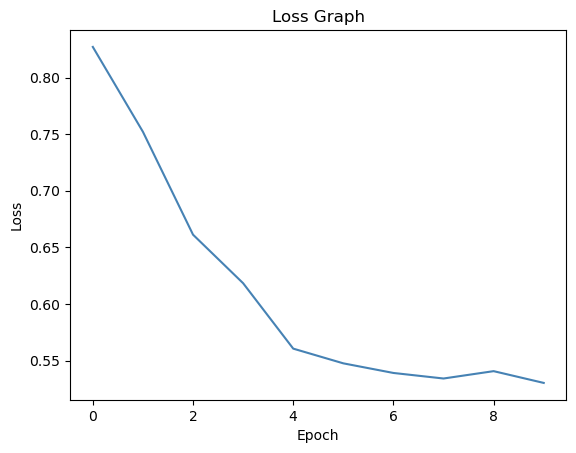

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(len(L)), L, color='#4682B4')
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.axhline(y=avg_loss, color='green', linestyle='--', linewidth=0.8, label="Baseline (y=0.5)")
#plt.ylim(0.65, 0.75)
plt.title("Loss Graph")
plt.show()

下面进行预测

In [16]:
def Exam():
    net.eval()
    tensor = torch.randint(0,2,(1, 2, 12, 12), dtype=torch.float32)
    expect = torch.sigmoid(net(tensor))
    np_sample = tensor.numpy()

    Chafen = []
    for i in range(2):
        array = np_sample[0][i]
        integer_list = []
        # 遍历每一行
        for row in array:
            # 每行分成两组 8 位（前 8 位和后 8 位）
            for i in range(0, 16, 8):
                # 取出每组 8 位，转化为二进制字符串
                binary_str = ''.join(str(int(x)) for x in row[i:i+8])
                # 将二进制字符串转换为整数并添加到列表
                integer_list.append(int(binary_str, 2))
        Chafen.append(integer_list)
        #print("差分：",integer_list)

    Value = []
    for i in range(16):
        Value.append(AES_Dif_Value[Chafen[0][i]][Chafen[1][i]])
    #print(Value)

    np_expect = expect.detach().numpy().reshape(12,12)
    #print(np_expect)
    np_expect = np.where(np_expect > 0.5, 1, 0)
    #print(np_expect)

    x1 = np_expect.reshape(12,12)
    x2 = x1 ^ np_sample[0][0].astype(int).reshape(12,12)
    #print("输入一:",x1)
    #print("输入二:",x2)
    ###预测答案

    Sol = []
    for x in Value:
        if x == []:
            Sol.append([])
        else:
            Sol.append([format(x[0][0],"08b"),format(x[0][1],"08b")])
    #print(Sol)    ###准确答案 

    R = np.ones((16,4))
    for i in range(16):
        m = (i//4)*3
        n = (i%4)*3
        a,b,c = x1[m:m+3,n:n+3],x2[m:m+3,n:n+3],Sol[i]
        if c == []:
            r = None
        else:
            c1 = np.array(list(c[0]), dtype=int)
            c2 = np.array(list(c[1]), dtype=int)
            c1 = np.append(c1,0).reshape(3,3)
            c2 = np.append(c2,0).reshape(3,3)
            r1 = np.sum(a ^ c1)
            r2 = np.sum(b ^ c2)
            r3 = np.sum(a ^ c2)
            r4 = np.sum(b ^ c1)
            r = [r1,r2,r3,r4]
        R[i] = r
    #print(R)   ###两种匹配共四个错误数

    Fault = np.nanmean(R)/9
    #print(Fault)
    return Fault

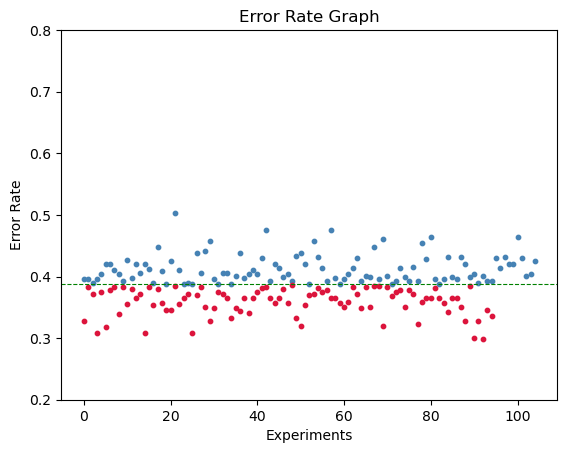

In [35]:
import matplotlib.pyplot as plt
Er = []
for i in range(200):
    f = Exam()
    Er.append(f)

up = [i for i in Er if i >= np.mean(Er)]
down = [i for i in Er if i < np.mean(Er)]
x1 = range(len(up))
x2 = range(len(down))

plt.scatter(x1, up, color='#4682B4', s=10)
plt.scatter(x2, down, color='#DC143C', s=10)
plt.xlabel("Experiments")
plt.ylabel("Error Rate")
plt.axhline(y=np.mean(Er), color='green', linestyle='--', linewidth=0.8, label="Baseline (y=0.5)")
plt.ylim(0.2, 0.8)
plt.title("Error Rate Graph")
plt.show()

In [145]:
###样本代入每层检验
model = net # 替换成你的模型
model.eval()  # 设置为评估模式，避免 dropout 等随机性

# 要记录每一层输出的字典
layer_outputs = {}

# 定义一个 hook 函数，保存每一层的输出
def hook_fn(module, input, output):
    layer_outputs[module] = output.detach()  # detach 是为了避免梯度

# 为模型的每一层注册 hook
hooks = []
for layer in model.children():
    hooks.append(layer.register_forward_hook(hook_fn))

# 准备一个输入样本（替换成你的样本）
input_sample = torch.randint(0,2,(1, 2, 12, 12), dtype=torch.float32) # 假设输入是一个 3x224x224 的图像
output = model(input_sample)

# 打印每一层的输出
for layer, output in layer_outputs.items():
    print(f"Layer: {layer}\nOutput Shape: {output.shape}\nValues: {output}\n")

# 记得清除 hooks
for hook in hooks:
    hook.remove()

Layer: Sequential(
  (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(3, 3))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
)
Output Shape: torch.Size([1, 64, 5, 5])
Values: tensor([[[[0.3760, 0.6608, 0.6608, 0.1116, 0.1116],
          [0.3760, 0.6608, 0.6608, 0.3159, 0.1116],
          [0.0935, 0.3083, 0.3159, 0.3159, 0.0697],
          [0.5568, 0.5568, 0.3127, 0.1501, 0.0808],
          [0.5568, 0.5568, 0.3127, 0.1501, 0.0808]],

         [[0.3025, 0.3025, 0.0000, 0.2684, 0.2684],
          [0.3025, 0.3025, 0.5151, 0.5151, 0.3124],
          [0.3684, 0.3684, 0.5151, 0.5151, 0.3124],
          [0.3684, 0.3684, 0.3582, 0.3582, 0.2600],
          [0.0000, 0.0441, 0.3582, 0.3582, 0.2600]],

         [[0.1201, 0.1201, 0.2498, 0.2498, 0.0000],
          [0.4030, 0.4030, 0.2498, 0.2498, 0.0000],
          [0.4030, 0.4030, 0.3969, 0.6836, 0.6836],
          [0.2796, 0.3969, 0.3969, 0.6836, 0.6836],
          [0.2796, 0.2796, 0.0372, 0.1665, 0.16

In [146]:
###每层参数
for name, param in net.state_dict().items():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param}")

Layer: 0.0.weight | Size: torch.Size([64, 2, 3, 3]) | Values: tensor([[[[-0.2347, -0.1917,  0.1914],
          [-0.2193, -0.0297,  0.0410],
          [-0.0085, -0.0378,  0.0850]],

         [[-0.1783,  0.0485, -0.0447],
          [ 0.0765,  0.2193,  0.0634],
          [ 0.0425,  0.1808, -0.1906]]],


        [[[ 0.2202,  0.0697,  0.1777],
          [ 0.0478,  0.1361, -0.0541],
          [-0.0863, -0.0184,  0.0616]],

         [[-0.2118,  0.1694, -0.0831],
          [ 0.1505, -0.0583,  0.0917],
          [-0.2160,  0.1785,  0.1366]]],


        [[[ 0.1164, -0.2072,  0.1232],
          [ 0.1856, -0.0857, -0.0772],
          [ 0.1866, -0.1094, -0.2069]],

         [[ 0.0296,  0.2104, -0.1145],
          [-0.0636,  0.0867,  0.0444],
          [ 0.2077, -0.0825, -0.0165]]],


        ...,


        [[[ 0.0069, -0.0262, -0.0591],
          [-0.0997,  0.1014,  0.0036],
          [-0.0685, -0.1363,  0.2319]],

         [[ 0.0265, -0.0231,  0.0561],
          [-0.0992,  0.2009,  0.1555],
      

In [147]:
print(net)

Sequential(
  (0): Sequential(
    (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Inception(
      (p1_1): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (p2_1): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (p2_2): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (p3_1): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (p3_2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (p4_1): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (p4_2): Conv2d(192, 32, kernel_size=(1, 1),